Sprint 1

Uploading files from your local file system
files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data which were uploaded.
https://colab.research.google.com/notebooks/io.ipynb#scrollTo=eikfzi8ZT_rW 

# Vamos a reutilizar el código escrito para el dataset de seguros y adaptarlo a las necesidades del precio de vivienda.

In [188]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (3).csv


Cargar el archivo en una variable para mejor manipulación

io — Core tools for working with streams

In [189]:
filename = next(iter(uploaded))  #obtener el nombre del archivo.  The next() function returns the next item from the iterator. iter() convert list to iterator.
#filename=uploaded.keys()    #se obtiene el nombre poro aun no pude sacarlo para uso
filename
  

'data.csv'

In [190]:
import pandas as pd

import io
#my_data = pd.read_csv(io.BytesIO(uploaded['data.csv']))  #necesario actualizar el nombre del archivo. ¿Como podré leerlo desde la carga anterior?
my_data = pd.read_csv(io.BytesIO(uploaded[filename]))  #resuelta la llamada al nombre del archivo.

# 2. Exploración de información

In [191]:
my_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [192]:
my_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [193]:
my_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [194]:
my_data.shape

(4600, 18)

In [195]:
my_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [196]:
my_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [197]:
my_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Con esta información descriptiva, podemos ir separando variables categoricas de variables realmente numéricas.
Categóricas: bathrooms, floors, waterfront, view, condition, state, city.

In [198]:
v_categoricas=['bathrooms', 'floors', 'waterfront', 'view', 'condition', 'statezip', 'city']

In [199]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns





In [200]:
my_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Concluyo que no hay datos nulos en el archivo

In [201]:
my_data.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Los tipos de datos se pudieron optener con dtypes pero también con la función info(9

In [202]:
print(len(np.unique(my_data['street'])))

4525


De acuerdo a los datos vistos, la calle (street) es tán específico que no creo que contribuya y puede eliminarse.

Hay casi tantas calles como renglones, este campo se puede desechar.

In [203]:
#descartar street
my_data=my_data.drop(['street'], axis=1)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(4)
memory usage: 611

In [204]:
# ciclo manual de gráficas i es el index de la columna
i=-1

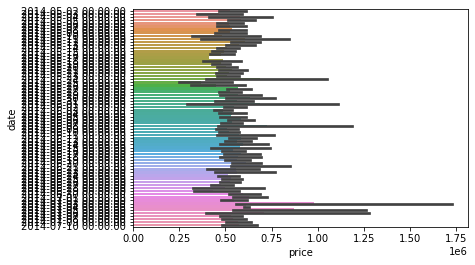

In [205]:
#barras
#intento de hacer un ciclo de gráficos.
columns_names = my_data.columns.values
#fig, axs = plt.subplots(16)
i=i+1
if i==1: i+1
#for item in columns_names:
#  if i==1: i=2
#  axs[i]
sns.barplot(data=my_data,y=columns_names[i],x='price',orient="h3")
#  i=1+1
# bedroms

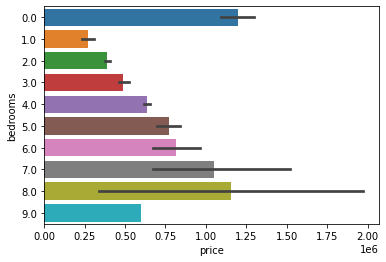

In [206]:
sns.barplot(data=my_data,y=columns_names[2],x='price',orient="h3")

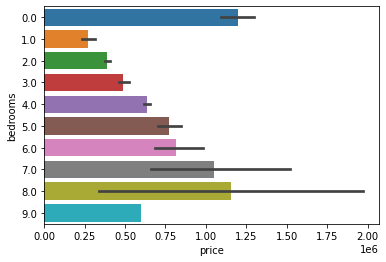

In [207]:
sns.barplot(data=my_data,y='bedrooms',x='price',orient="h3")

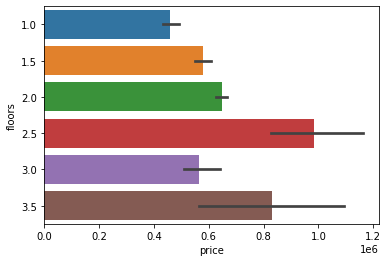

In [208]:
sns.barplot(data=my_data,y='floors',x='price',orient="h3")

Los precios se incrementan conforme aumentan variables como cuartos o baños con algunas desviaciones que no se explican con este gráfico. habría que separar otras variables como fumadores de no fumadores.

In [209]:
#plt.figure(figsize=(15,20))

In [210]:
#regplot
#sns.set(style="darkgrid")
#sns.regplot()

In [211]:
#displot
#sns.displot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f560913fd90>,
      dtype=object)

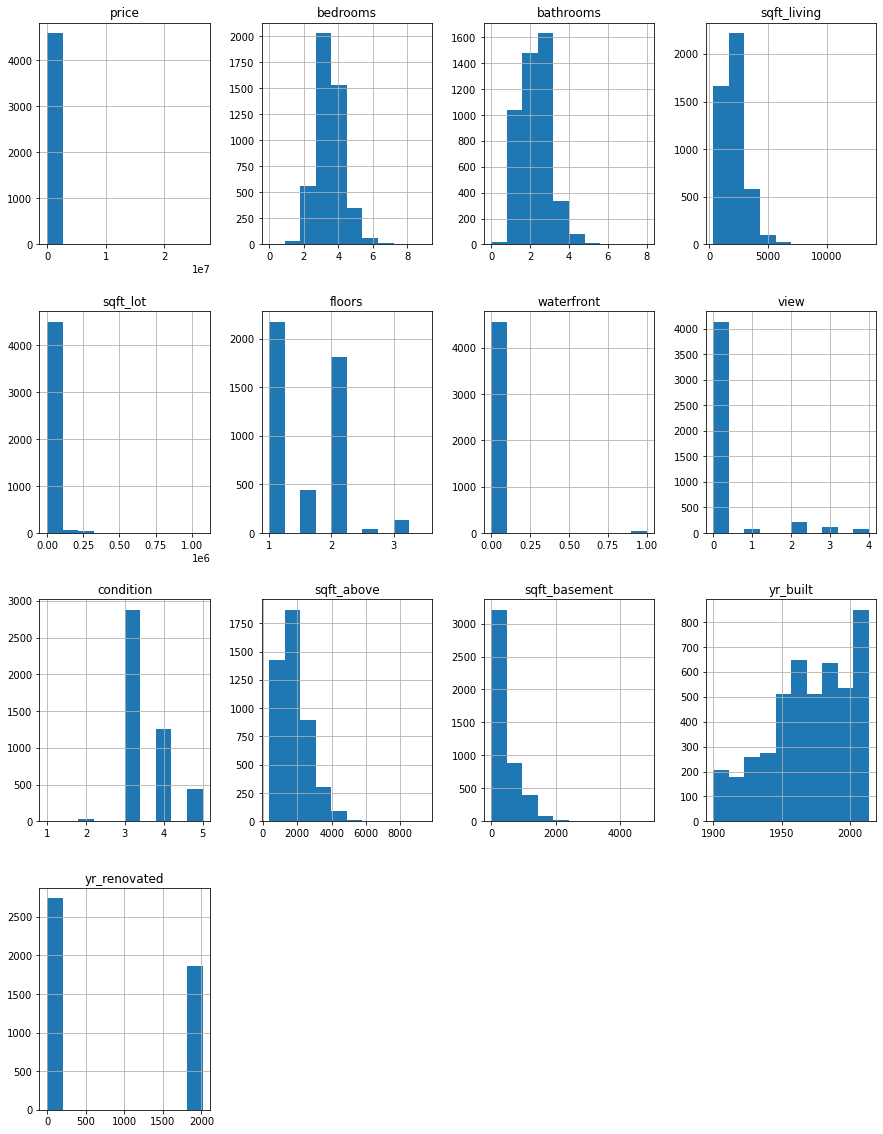

In [212]:
#histograma
my_data.hist(figsize=(15,20))

Conclusiones del histograma: Se confirman las variables categoricas en estos histogramas


## Vamos a usar scatter para ver la relación precio con cada variable usando un indice i (quería hacer un ciclo pero no logré que no borrara el gráfico anterior) que moveremos manualmente para recorrer cada variable.

bedrooms


Text(0.5, 1.0, 'precio/bedrooms')

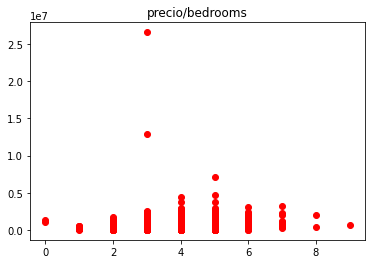

In [213]:
colores = ['blue','green','red','cyan','magenta','yellow','black','white','blue','green','red','cyan','magenta','yellow','black','white','blue','green','red','cyan','magenta','yellow','black','white']
i=2
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])
  

bathrooms


Text(0.5, 1.0, 'precio/bathrooms')

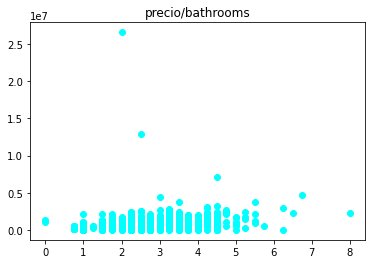

In [214]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

sqft_living


Text(0.5, 1.0, 'precio/sqft_living')

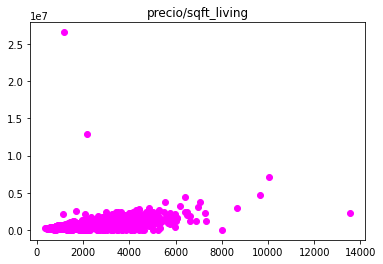

In [215]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

sqft_lot


Text(0.5, 1.0, 'precio/sqft_lot')

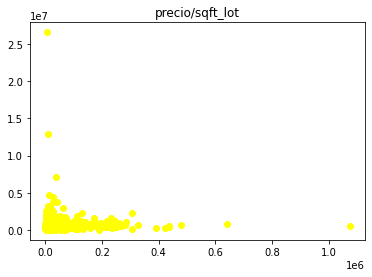

In [216]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

floors


Text(0.5, 1.0, 'precio/floors')

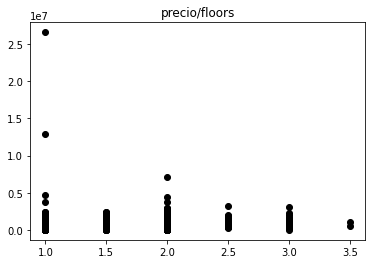

In [217]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

waterfront


Text(0.5, 1.0, 'precio/waterfront')

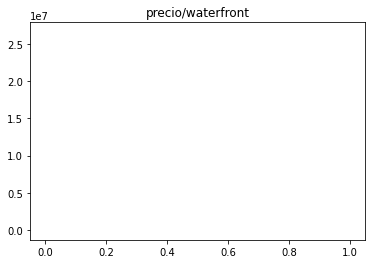

In [218]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

view


Text(0.5, 1.0, 'precio/view')

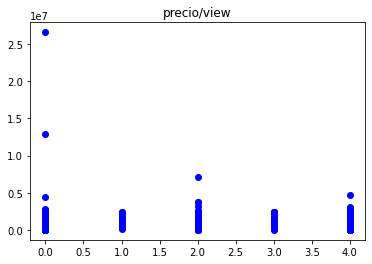

In [219]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

condition


Text(0.5, 1.0, 'precio/condition')

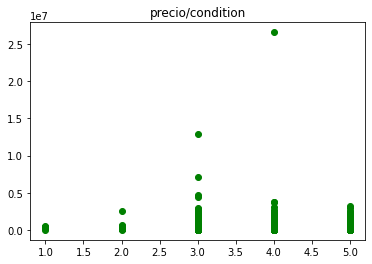

In [220]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

sqft_above


Text(0.5, 1.0, 'precio/sqft_above')

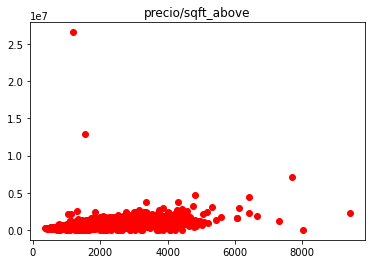

In [221]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

Esta variable sqft_above tambien muestra cierta consistencia con el los precios aunque solo en la parte superior del ploteo.

sqft_basement


Text(0.5, 1.0, 'precio/sqft_basement')

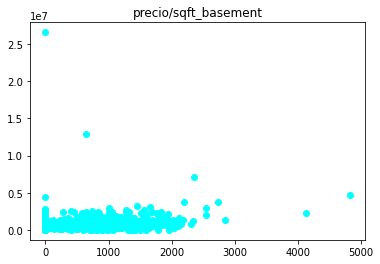

In [222]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

yr_built


Text(0.5, 1.0, 'precio/yr_built')

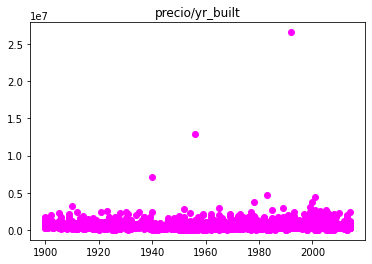

In [223]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

yr_renovated


Text(0.5, 1.0, 'precio/yr_renovated')

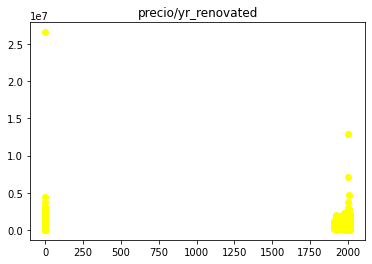

In [224]:
i=i+1
print(columns_names[i])
x=my_data[columns_names[i]]
y=my_data["price"]
plt.scatter(x,y,label="data",color=colores[i])
plt.title("precio/"+columns_names[i])

Parece que en renovado hay que separar los años de renovación y los no renovados como dos atributos diferentes en el dataset.

en algunas variables se puede notar cierto aumento entre metros y precio, sin embargo no es del todo claro ya que muchos puntos se mantienen por la parte baja.

usaremos otro gráfico para los atributos categóricos:

Text(0.5, 1.0, 'precio/bedrooms')

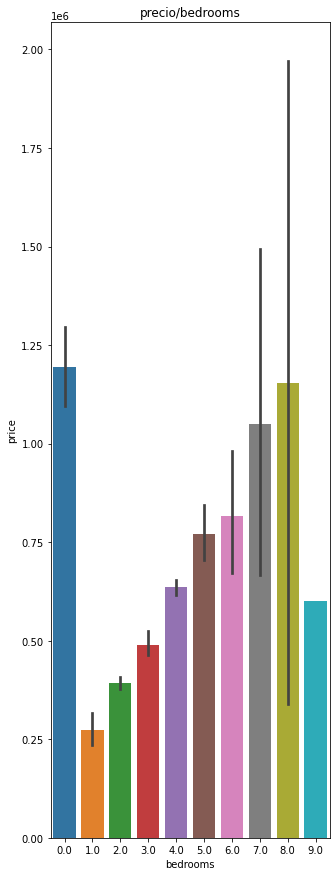

In [225]:
i=2
plt.figure(figsize=(5,15))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

En general a mayor número de recámaras mayor precio, parece tener mayor relación. el cero y el 9 contrastan en esta gráfica, pero hace sentido considerar la variable como categórica y no numérica.

Text(0.5, 1.0, 'precio/bathrooms')

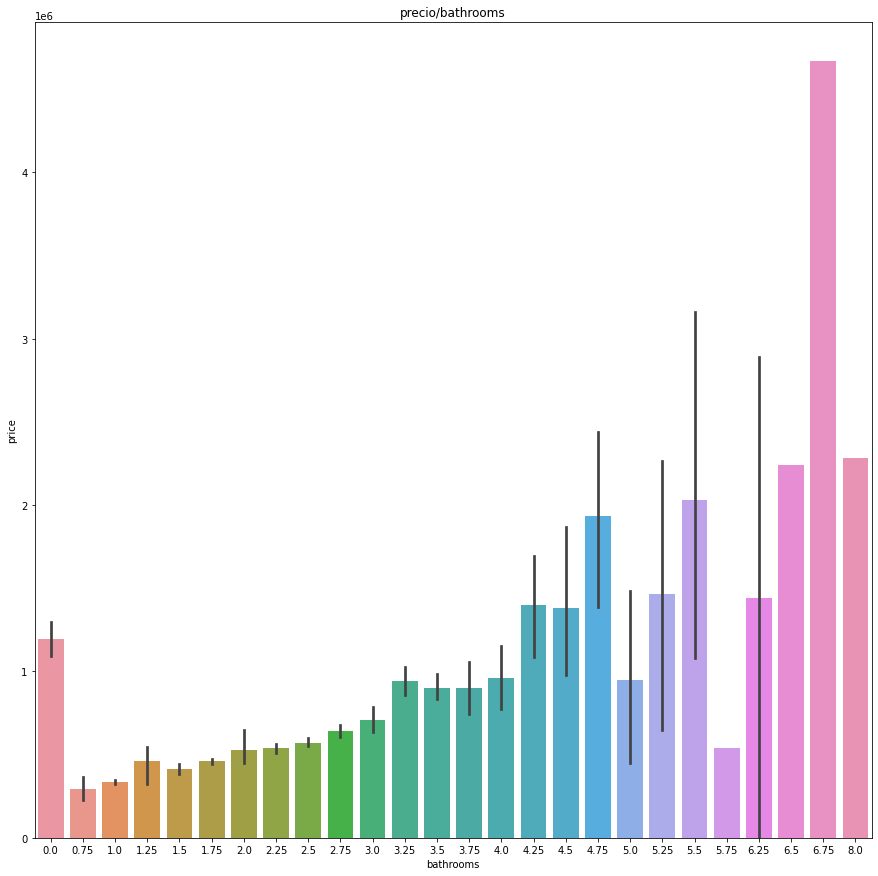

In [226]:
i=3
plt.figure(figsize=(15,15))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

En general mas baños mayor precio, aunque llama la atención cero baños como una excepción, que pudiera ser una omisión de datos a depurar de la base.

Text(0.5, 1.0, 'precio/floors')

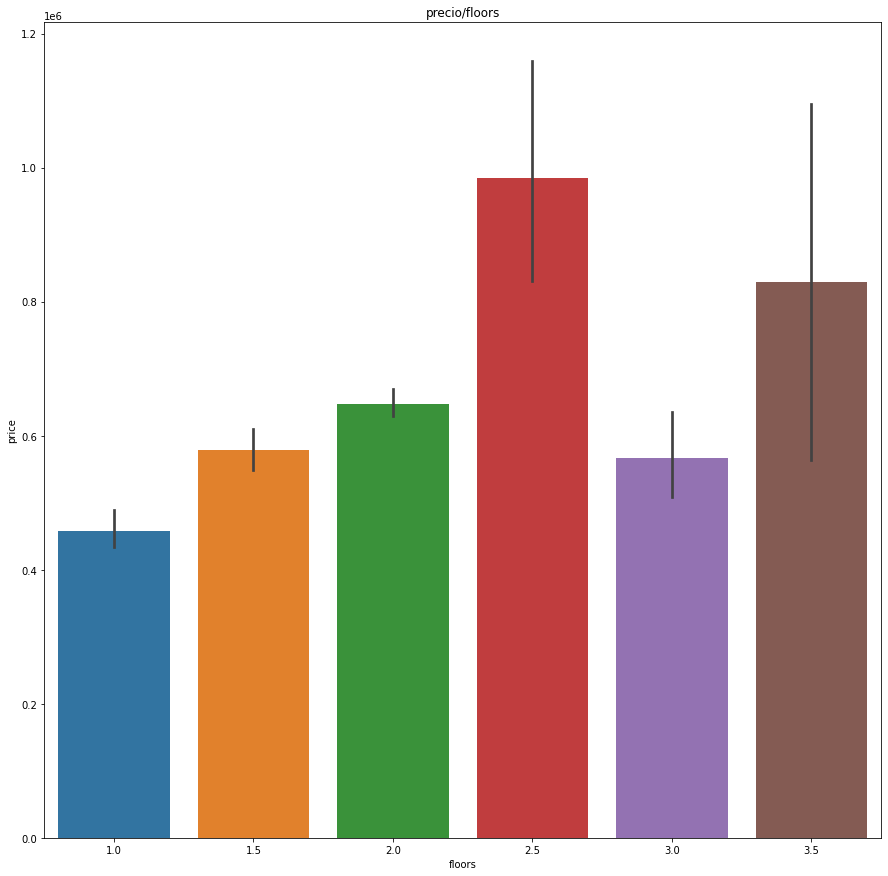

In [227]:
i=6
plt.figure(figsize=(15,15))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

Text(0.5, 1.0, 'precio/waterfront')

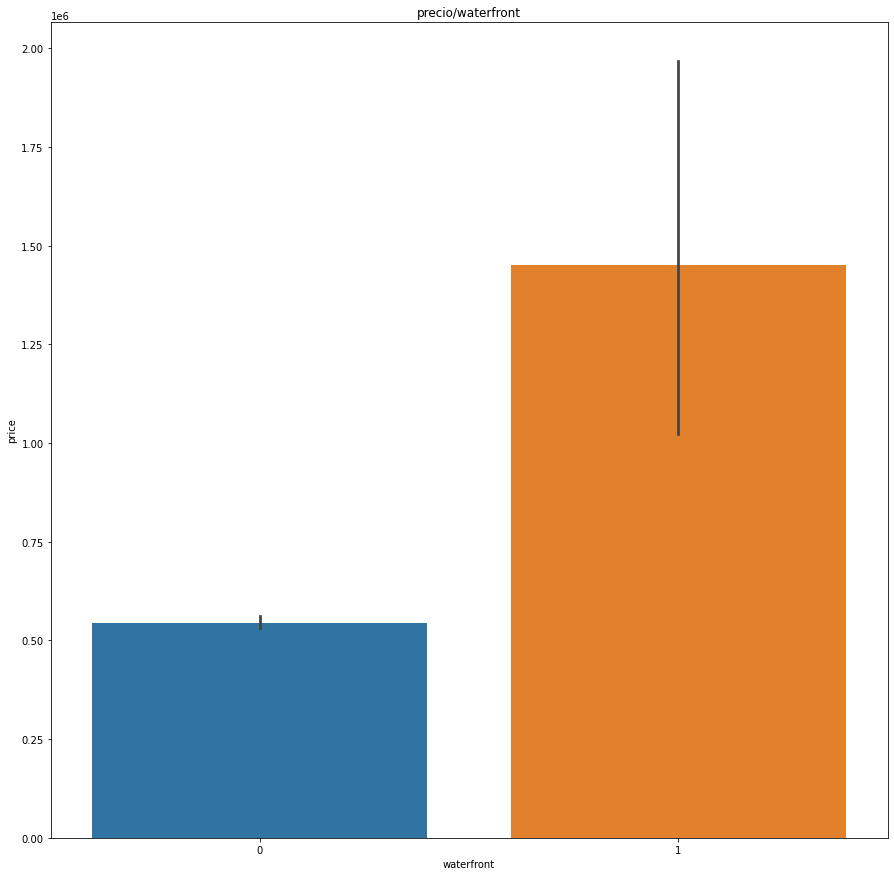

In [228]:
i=7
plt.figure(figsize=(15,15))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

Variable binaria, con Waterfront incrementa el precio en general

Text(0.5, 1.0, 'precio/view')

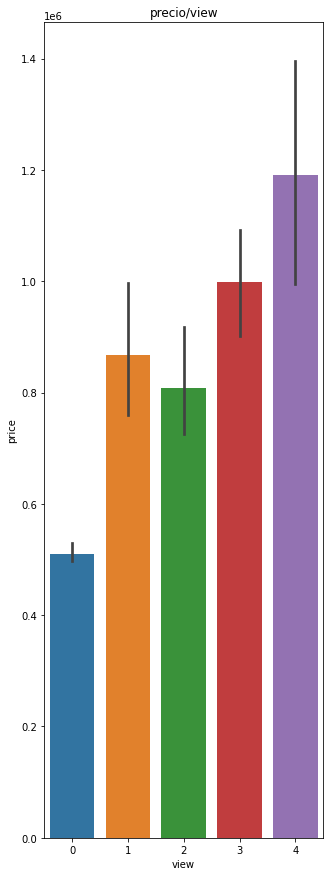

In [229]:
i=8
plt.figure(figsize=(5,15))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

A mayor calificación de vista, mayor precio, también variable que se podría considerar categórica.

Text(0.5, 1.0, 'precio/condition')

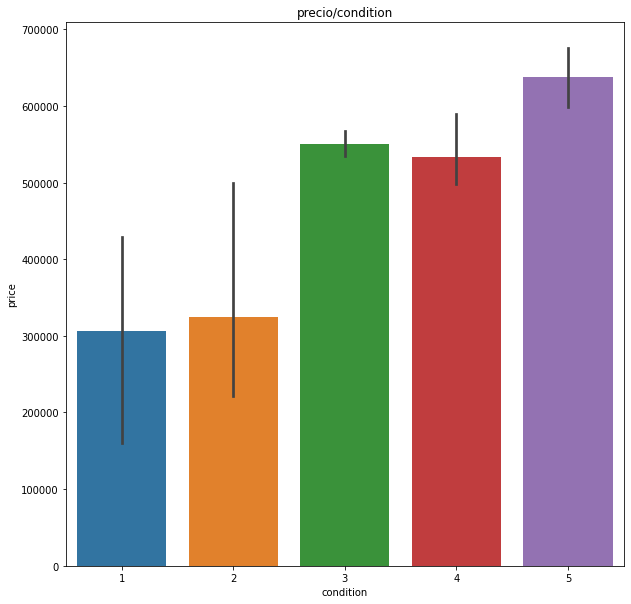

In [230]:
i=9
plt.figure(figsize=(10,10))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

También muestra una relación categórica

Text(0.5, 1.0, 'precio/city')

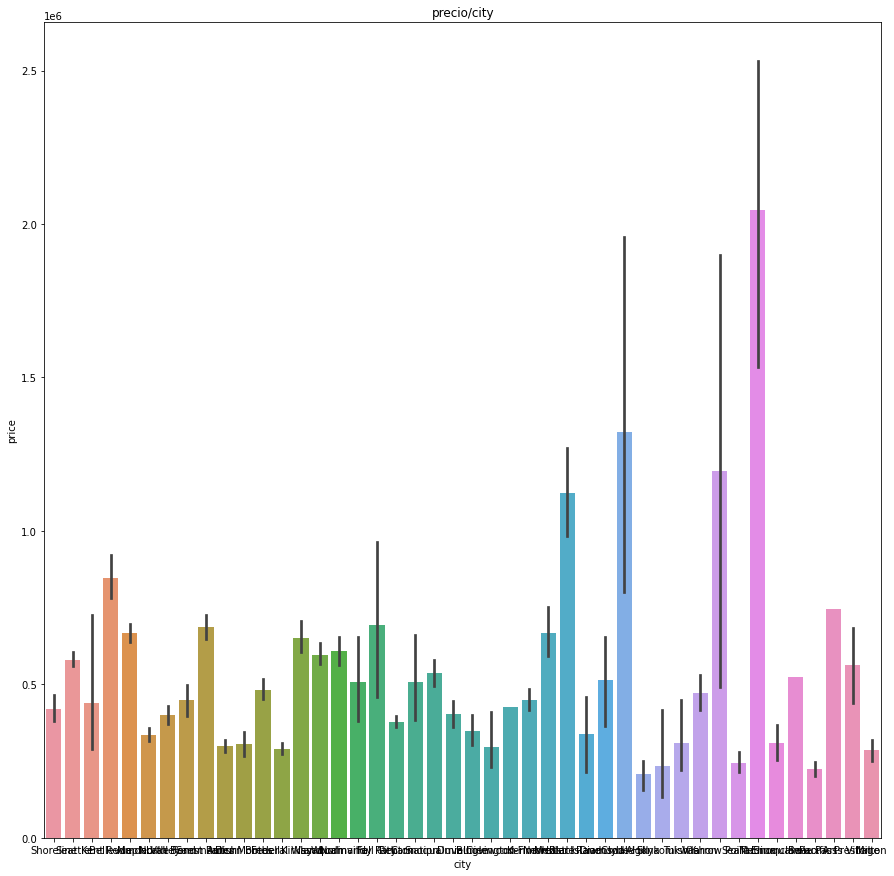

In [231]:
i=14
plt.figure(figsize=(15,15))
sns.barplot(x=my_data[columns_names[i]],y=my_data[columns_names[1]])
plt.title("precio/"+columns_names[i])

Conclusión final:  Par un modelo predictivo del precio, se ven algunos indicios de variables categoricas que si que influyen en el precio de la vivienda, estos habá que combinarlos con alguna de las variables numéricas como tamaño de la vivienda.

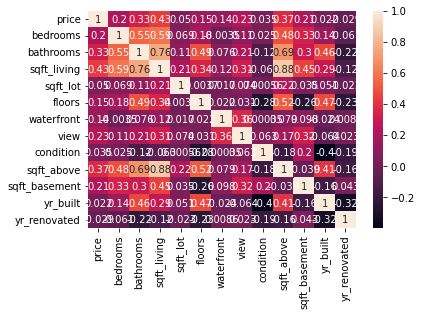

In [232]:
sns.heatmap(my_data.corr(), annot=True)

En el mapa de correlaciones se ven bajas correlaciones entre variables.

Conservamos todas las variables ya que no hay correlación entre ellas.

# Entrenamiento Regresión lineal:

quitamos la variable dependiente y validamos el dataset


Como hay variables no numéricas vamos aprovar regresión con estas variables, quitaremos las no numéricas

In [233]:
v_categoricas

['bathrooms', 'floors', 'waterfront', 'view', 'condition', 'statezip', 'city']

Eliminar dimensiones no necesarias (me regresé a esta linea ya que estaba siendo repetitivo y no agregaban valor).

In [234]:
my_data=my_data.drop(['date','country'],axis=1)

In [235]:
num_my_data= my_data.drop(v_categoricas, axis=1)
num_my_data

,price,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1340,7912,1340,0,1955,2005
1,2.384000e+06,5.0,3650,9050,3370,280,1921,0
2,3.420000e+05,3.0,1930,11947,1930,0,1966,0
3,4.200000e+05,3.0,2000,8030,1000,1000,1963,0
4,5.500000e+05,4.0,1940,10500,1140,800,1976,1992
...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1510,6360,1510,0,1954,1979
4596,5.343333e+05,3.0,1460,7573,1460,0,1983,2009
4597,4.169042e+05,3.0,3010,7014,3010,0,2009,0
4598,2.034000e+05,4.0,2090,6630,1070,1020,1974,0


##Primera hipótesis regresión lineal con variables no categoricas

In [236]:
#variable objetivo
x=num_my_data.drop(['price'],axis=1)   #quitar variable x del set de datos y la variable date.
x.head()

,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1340,7912,1340,0,1955,2005
1,5.0,3650,9050,3370,280,1921,0
2,3.0,1930,11947,1930,0,1966,0
3,3.0,2000,8030,1000,1000,1963,0
4,4.0,1940,10500,1140,800,1976,1992


In [237]:
y=num_my_data['price']   #definir la variable a predecir 



In [238]:
#separar train & test data
from sklearn.model_selection import train_test_split  #importar librería para separar datos train y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=43)
#Ejecutar regresión
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

# calcular precisión del modelo.
print("Precisión del entrenamiento:", lin_reg.score(x_train,y_train))
print("Precisión del test:", lin_reg.score(x_test,y_test))


Precisión del entrenamiento: 0.17221626896037012
Precisión del test: 0.4939954371306705


Validación Hipótesis 1

In [239]:
from sklearn.metrics import mean_squared_error
y_pred_test=lin_reg.predict(x_test)  #predicción de test data equivale a y_test
y_pred_train=lin_reg.predict(x_train) #predicción de entrenamiento

mse_y_trn= mean_squared_error(y_train,y_pred_train)
print("mse de trn data ",mse_y_trn)

mse_y_tst= mean_squared_error(y_test,y_pred_test)
print("mse de trn data ",mse_y_tst)


mse de trn data  296356869541.1434
mse de trn data  79416969700.2238


El error es muy alto por lo que estas variables no explican el comportamiento de la dependiente. 

##Hipótesis 2:Usaremos las variables categoricas y para ello hay que convertirlas a numéricas:

Hipótisis con variables categoricas usando One Hot Encoding

In [240]:
cat_my_data=pd.get_dummies(data=my_data, prefix='OHE', prefix_sep=" ",
                           columns = v_categoricas,
                           drop_first=True,
                           dtype='int8' )
#OHE==> One Hot Encoding. se establece como prefijo de la columna para identificación.
# en columns seleccionamos que variables queremos transformar.
cat_my_data.head()

,price,bedrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,OHE 0.75,OHE 1.0,...,OHE SeaTac,OHE Seattle,OHE Shoreline,OHE Skykomish,OHE Snoqualmie,OHE Snoqualmie Pass,OHE Tukwila,OHE Vashon,OHE Woodinville,OHE Yarrow Point
0,313000.0,3.0,1340,7912,1340,0,1955,2005,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,3650,9050,3370,280,1921,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,1930,11947,1930,0,1966,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2000,8030,1000,1000,1963,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,1940,10500,1140,800,1976,1992,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
x2=cat_my_data.drop(['price'],axis=1)  
y2=cat_my_data['price'] 
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.20, random_state=43)
#Ejecutar regresión
# ya importado: from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x2_train,y2_train)

# calcular precisión del modelo.
print("Precisión del entrenamiento:", lin_reg.score(x2_train,y2_train))
print("Precisión del test:", lin_reg.score(x2_test,y2_test))


Precisión del entrenamiento: 0.27458592044354146
Precisión del test: -66.49883586239955


Validación hipotesis 2 con MSE:

In [242]:
y2_pred_test=lin_reg.predict(x2_test)  #predicción de test data equivale a y_test
y2_pred_train=lin_reg.predict(x2_train) #predicción de entrenamiento

mse_y_trn= mean_squared_error(y2_train,y2_pred_train)
print("mse de trn data ",mse_y_trn)

mse_y_tst= mean_squared_error(y2_test,y2_pred_test)
print("mse de trn data ",mse_y_tst)


mse de trn data  259707261301.72012
mse de trn data  10593882735142.195


Tampoco tiene un error aceptable.
##Hipotesis 3 con variables normalizadas


In [243]:
x3=cat_my_data.drop(['price'],axis=1) 
y3=cat_my_data['price'] 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#SKlern trabaja con matrices por lo que hay que transformarlo de series a matriz
# .to_numpy() lo convierte en array
# reshape(-1,1) transforma array de 1xn en matriz de nx1
y3=scaler.fit_transform(y3.to_numpy().reshape(-1,1))
# se regresa con reshape a array de 1xn ¿no se podría hacer con el reshape de arriba (1,-1)?
y3=y3.reshape(1,-1)[0]



Entrenar hipotesis 3:

In [244]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.20, random_state=43)
#Ejecutar regresión
# ya importado: from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x3_train,y3_train)

# calcular precisión del modelo.
print("Precisión del entrenamiento:", lin_reg.score(x3_train,y3_train))
print("Precisión del test:", lin_reg.score(x3_test,y3_test))

Precisión del entrenamiento: 0.2745859016273221
Precisión del test: -66.49876396543566


Validación Hipotesis 3:

In [245]:
from sklearn.metrics import r2_score
y3_pred_test=lin_reg.predict(x3_test)  #predicción de test data equivale a y_test
y3_pred_train=lin_reg.predict(x3_train) #predicción de entrenamiento

mse_y_trn= mean_squared_error(y3_train,y3_pred_train)
print("mse de trn data ",mse_y_trn)

mse_y_tst= mean_squared_error(y3_test,y3_pred_test)
print("mse de test data ",mse_y_tst)

mse_y_tst= r2_score(y3_test,y3_pred_test)
print("r2:",mse_y_tst)


mse de trn data  0.8170994567675979
mse de test data  33.33078305065866
r2: -66.49876396543566


El error ya está más cercano a cero, sin embargo es 33 y su r2 está lejos de 1.

Tampoco tiene un error aceptable.
##Hipotesis 4 con variables normalizadas MaxAbsScaler


In [246]:
x4=cat_my_data.drop(['price'],axis=1) 
y4=cat_my_data['price'] 
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
#SKlern trabaja con matrices por lo que hay que transformarlo de series a matriz
# .to_numpy() lo convierte en array
# reshape(-1,1) transforma array de 1xn en matriz de nx1
y4=scaler.fit_transform(y4.to_numpy().reshape(-1,1))
# se regresa con reshape a array de 1xn ¿no se podría hacer con el reshape de arriba (1,-1)?
y4=y4.reshape(1,-1)[0]



Entrenar hipotesis 4:

In [247]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size=0.20, random_state=43)
#Ejecutar regresión
# ya importado: from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x4_train,y4_train)

# calcular precisión del modelo.
print("Precisión del entrenamiento:", lin_reg.score(x4_train,y4_train))
print("Precisión del test:", lin_reg.score(x4_test,y4_test))

Precisión del entrenamiento: 0.2745859984882819
Precisión del test: -66.49882845079523


Validación Hipotesis 4:

In [248]:
from sklearn.metrics import r2_score
y4_pred_test=lin_reg.predict(x4_test)  #predicción de test data equivale a y_test
y4_pred_train=lin_reg.predict(x4_train) #predicción de entrenamiento

mse_y_trn= mean_squared_error(y4_train,y4_pred_train)
print("mse de trn data ",mse_y_trn)

mse_y_tst= mean_squared_error(y4_test,y4_pred_test)
print("mse de test data ",mse_y_tst)

mse_y_tst= r2_score(y4_test,y4_pred_test)
print("r2:",mse_y_tst)


mse de trn data  0.00036732236435968034
mse de test data  0.014983678261015985
r2: -66.49882845079523


El error ya está más cercano a cero, este modelo será el que usemos por ajustar mejor.

##Hipotesis 5 MinMaxEscaler

In [249]:
x5=cat_my_data.drop(['price'],axis=1) 
y5=cat_my_data['price'] 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#SKlern trabaja con matrices por lo que hay que transformarlo de series a matriz
# .to_numpy() lo convierte en array
# reshape(-1,1) transforma array de 1xn en matriz de nx1
y5=scaler.fit_transform(y5.to_numpy().reshape(-1,1))
# se regresa con reshape a array de 1xn ¿no se podría hacer con el reshape de arriba (1,-1)?
y5=y5.reshape(1,-1)[0]



Entrenar hipotesis 5:

In [250]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5, test_size=0.20, random_state=43)
#Ejecutar regresión
# ya importado: from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x5_train,y5_train)

# calcular precisión del modelo.
print("Precisión del entrenamiento:", lin_reg.score(x5_train,y5_train))
print("Precisión del test:", lin_reg.score(x5_test,y5_test))

Precisión del entrenamiento: 0.27458582213172944
Precisión del test: -66.4989429821823


Validación Hipotesis 5:

In [251]:
from sklearn.metrics import r2_score
y5_pred_test=lin_reg.predict(x5_test)  #predicción de test data equivale a y_test
y5_pred_train=lin_reg.predict(x5_train) #predicción de entrenamiento

mse_y_trn= mean_squared_error(y5_train,y5_pred_train)
print("mse de trn data ",mse_y_trn)

mse_y_tst= mean_squared_error(y5_test,y5_pred_test)
print("mse de test data ",mse_y_tst)

mse_y_tst= r2_score(y5_test,y5_pred_test)
print("r2:",mse_y_tst)


mse de trn data  0.00036732245366000497
mse de test data  0.014983703685182509
r2: -66.4989429821823


MinMaxScaler y MaxAbsScaler dan el mismo resultado (asumo que no hay diferencias en el ajuste de datos).